### Question 1)
Read the given dataset as a dataframe and check for missing values

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
import warnings

In [2]:
df = pd.read_csv("jewel.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.isnull().values.any()

False

### Question 2)
Create line plots for 'y', 'z', 'depth', and 'table' attributes versus price separately in order to check for potential outliers.

In [5]:
def plotting_func(price, other, color):
    plt.plot(df[[price]], df[[other]], color = color)
    plt.title(price + " vs " + other)
    plt.xlabel(price)
    plt.ylabel(other)
    figure_title = "Figure " + other
    return plt.figure(figure_title)

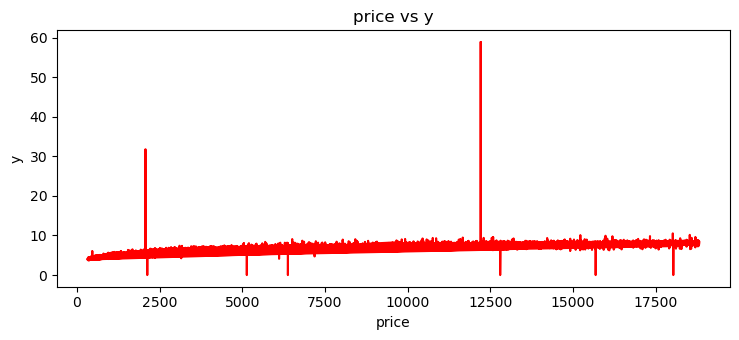

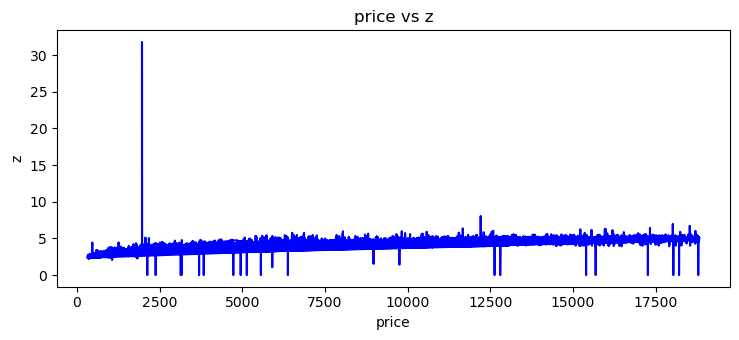

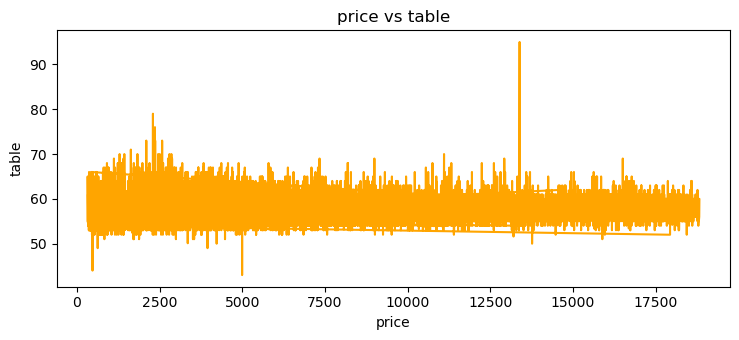

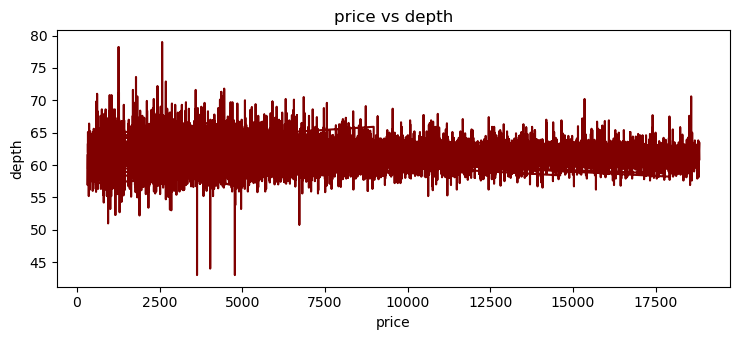

<Figure size 750x350 with 0 Axes>

In [6]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig1 = plotting_func("price", "y", "red")
fig2 = plotting_func("price", "z", "blue")
fig3 = plotting_func("price", "table", "orange")
fig4 = plotting_func("price", "depth", "maroon")

plt.show()

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Question 3)

Find and remove outliers by analyzing the above output of question 2. Explain your outlier detection process.

In [8]:
# I just checked for outliers in the data with IQR(Interquertile Range) Formula. Visualized the data to see the results better.
# Checked the ratio of the outliers and some data and then marked the outliers null in the data.
# I dropped the NAN values afterwards to remove outliers because data wouldn't lose that much of row.
# Then i checked the data with visualization.

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

def print_outliers(df, outliers, name):
    print("Data of Outliers for ", name)
    print("---------------------\n")
    print("length of the data given: "+ str(len(df)))
    print("number of outliers: "+ str(len(outliers)))
    print("Ratio of the Outliers: "+ str(float(len(outliers) / len(df) * 100)))
    print("max outlier value: "+ str(outliers.max()))
    print("min outlier value: "+ str(outliers.min()))
    print("---------------------")
    
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna()

   return outliers_dropped

In [9]:
outliers = find_outliers_IQR(df["depth"])
print_outliers(df, outliers,"depth")
outliers = find_outliers_IQR(df["y"])
print_outliers(df, outliers,"y")
outliers = find_outliers_IQR(df["z"])
print_outliers(df, outliers,"z")
outliers = find_outliers_IQR(df["table"])
print_outliers(df, outliers,"table")

Data of Outliers for  depth
---------------------

length of the data given: 53940
number of outliers: 2545
Ratio of the Outliers: 4.718205413422321
max outlier value: 79.0
min outlier value: 43.0
---------------------
Data of Outliers for  y
---------------------

length of the data given: 53940
number of outliers: 29
Ratio of the Outliers: 0.053763440860215055
max outlier value: 58.9
min outlier value: 0.0
---------------------
Data of Outliers for  z
---------------------

length of the data given: 53940
number of outliers: 49
Ratio of the Outliers: 0.09084167593622544
max outlier value: 31.8
min outlier value: 0.0
---------------------
Data of Outliers for  table
---------------------

length of the data given: 53940
number of outliers: 605
Ratio of the Outliers: 1.121616611049314
max outlier value: 95.0
min outlier value: 43.0
---------------------


In [10]:
df["table"] = drop_outliers_IQR(df["table"])
df["y"] = drop_outliers_IQR(df["y"])
df["z"] = drop_outliers_IQR(df["z"])
df["depth"] = drop_outliers_IQR(df["depth"])

df = df.dropna().reset_index()

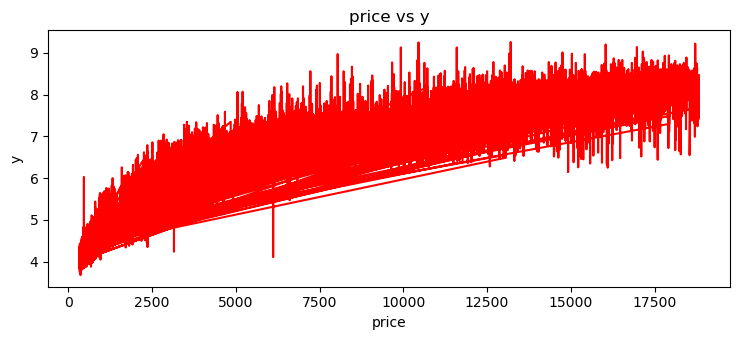

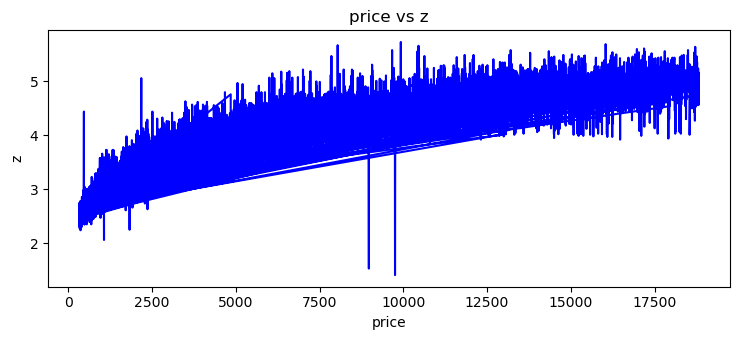

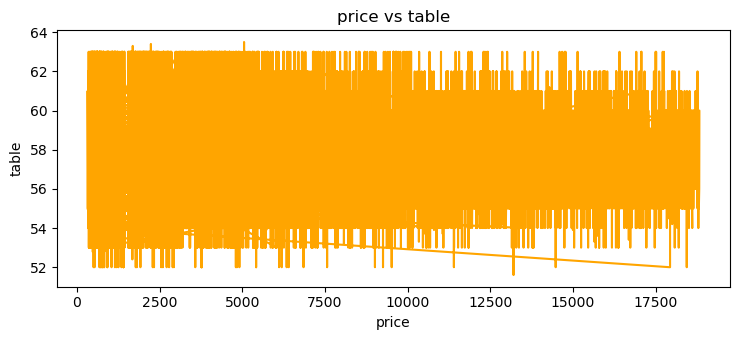

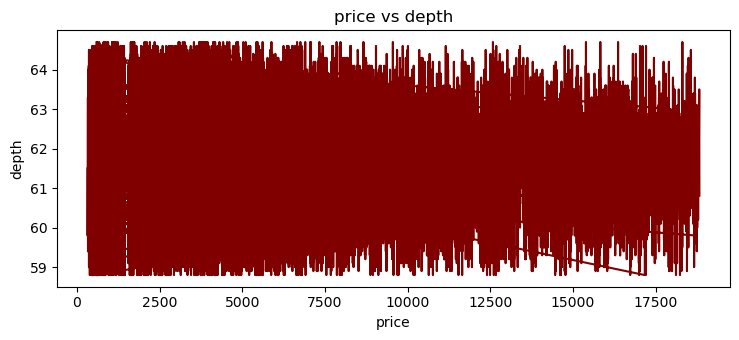

<Figure size 750x350 with 0 Axes>

In [11]:
fig1 = plotting_func("price", "y", "red")
fig2 = plotting_func("price", "z", "blue")
fig3 = plotting_func("price", "table", "orange")
fig4 = plotting_func("price", "depth", "maroon")

plt.show()

### Question 4)
Replace ordinal values (cut, color, clarity) according to rules below:
- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [12]:
# making sure that there is no other values in there
conv_dict_cut={'Good':1,'Very Good':2,'Fair':3,'Ideal':4,'Premium': 5}
conv_dict_color={'J':1,'I':2,'H':3,'G':4,'F': 5,'E':6,'D': 7}
clarity={'I1':1,'SI1':2,'SI2':3,'VS1':4,'VS2': 5,'VVS1':6,'VVS2': 7,'IF': 8}

df['cut']=df.cut.apply(conv_dict_cut.get)
df['color']=df.color.apply(conv_dict_color.get)
df['clarity']=df.clarity.apply(clarity.get)

df

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,4,6,3,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,5,6,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.29,5,2,5,62.4,58.0,334,4.20,4.23,2.63
3,4,0.31,1,1,3,63.3,58.0,335,4.34,4.35,2.75
4,5,0.24,2,1,7,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...,...
50966,53935,0.72,4,7,2,60.8,57.0,2757,5.75,5.76,3.50
50967,53936,0.72,1,7,2,63.1,55.0,2757,5.69,5.75,3.61
50968,53937,0.70,2,7,2,62.8,60.0,2757,5.66,5.68,3.56
50969,53938,0.86,5,3,3,61.0,58.0,2757,6.15,6.12,3.74


### Question 5)
Create bar graphs for 'cut', 'color', and 'clarity' attributes with their new values to analyze the dataset visually.


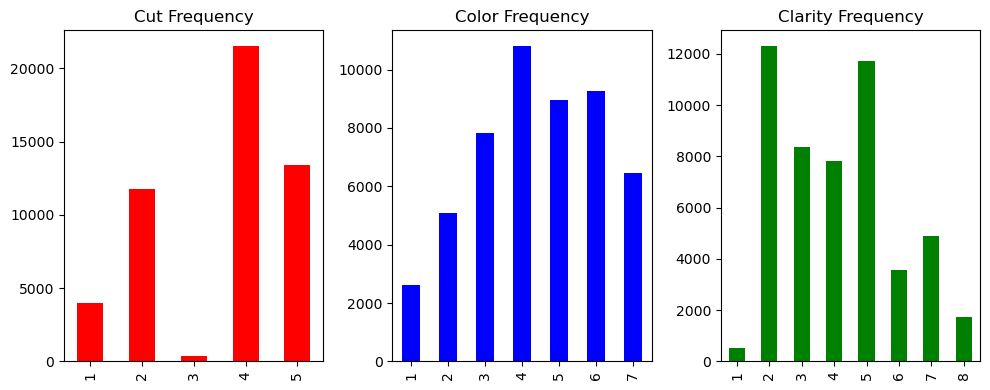

In [13]:
# solution code
x_values = [i for i in range(1,9)]
cut_freq = df["cut"].value_counts().sort_index()
color_freq = df["color"].value_counts().sort_index()
clarity_freq = df["clarity"].value_counts().sort_index()


plt.subplot(131)
cut_freq.plot(kind="bar",figsize=(10, 4), color ="r")
plt.title("Cut Frequency")

plt.subplot(132)
color_freq.plot(kind="bar",figsize=(10, 4), color = "b")
plt.title("Color Frequency")

plt.subplot(133)
clarity_freq.plot(kind="bar",figsize=(10, 4), color = "g")
plt.title("Clarity Frequency")

plt.show()

### Question 6)
Shuffle the data points and split the dataset into training and testing set, with a 0.7-0.3 ratio (training set will be %70, and test set will be %30 of the dataset) (Write your own shuffling and spliting code here, do not use predefined function train_test_split).



In [14]:
def shuffle (arr, n):
    for i in range(n-1,0,-1):
        j = random.randint(0,i+1)
        arr[i],arr[j] = arr[j],arr[i]
    return arr


In [15]:
# solution code

r = list(range(len(df)))
r = shuffle(r, len(df))

df["index"] = r
df = df.reindex().set_index("index")
df.sort_index(inplace = True)


training_set = df[:int(len(df)*0.7)]
test_set = df[int(len(df)*0.7):]
training_set

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
0,0.51,4,3,4,62.7,54.0,1438,5.12,5.15,3.22
1,1.24,2,3,3,60.0,58.0,5858,6.99,7.05,4.21
2,0.90,2,7,2,62.1,60.0,3880,6.14,6.20,3.83
3,1.06,4,5,7,62.1,57.0,8954,6.50,6.54,4.05
4,1.07,4,6,3,62.4,57.0,4698,6.55,6.52,4.08
...,...,...,...,...,...,...,...,...,...,...
35674,0.32,4,4,6,61.1,55.0,796,4.46,4.48,2.73
35675,0.31,5,3,7,62.4,59.0,625,4.31,4.35,2.70
35676,0.52,4,3,7,61.8,57.0,1581,5.16,5.19,3.20


### Question 7)

Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Then, make prediction and calculate mean squared error (MSE). Calculate MSE for k value between 1-30 and print them. Finally, create elbow function to find best k value and plot the elbow curve. Explain how you find the best k-value.

In [16]:
# I will calculate the mean squared error of 1-30 neighbors and get the lowest

warnings.filterwarnings('ignore')

X_train = training_set[["cut","color", "clarity", "x", "y", "z","carat", "depth", "table"]].values
Y_train = training_set["price"].values

X_test = test_set[["cut","color", "clarity", "x", "y", "z","carat", "depth", "table"]].values
Y_test = test_set["price"].values


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
errors = []
K = range(1,30)
for i in K:
    classifier = neighbors.KNeighborsRegressor(n_neighbors = i)
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test)
    s = mean_squared_error(Y_test,Y_pred)
    errors.append(s)
    print("prediction : ", i , " ", s)

prediction :  1   850145.0950170023
prediction :  2   698260.0242774
prediction :  3   672194.1863356294
prediction :  4   665069.7343668258
prediction :  5   658778.7295448601
prediction :  6   659285.9636102392
prediction :  7   659036.7746414024
prediction :  8   655579.9226403103
prediction :  9   660804.6728726067
prediction :  10   668289.0202739994
prediction :  11   666898.4013458125
prediction :  12   669024.5278458962
prediction :  13   668316.1251414283
prediction :  14   674232.4773601108
prediction :  15   680565.954682768
prediction :  16   684982.1254863654
prediction :  17   690583.1634674304
prediction :  18   694711.3763657993
prediction :  19   697503.9919721571
prediction :  20   701113.3057302838
prediction :  21   703412.631198089
prediction :  22   704863.9955555273
prediction :  23   708794.2800056816
prediction :  24   713296.2009984569
prediction :  25   718625.4796360973
prediction :  26   722467.9106655722
prediction :  27   725802.4107357569
prediction :  2

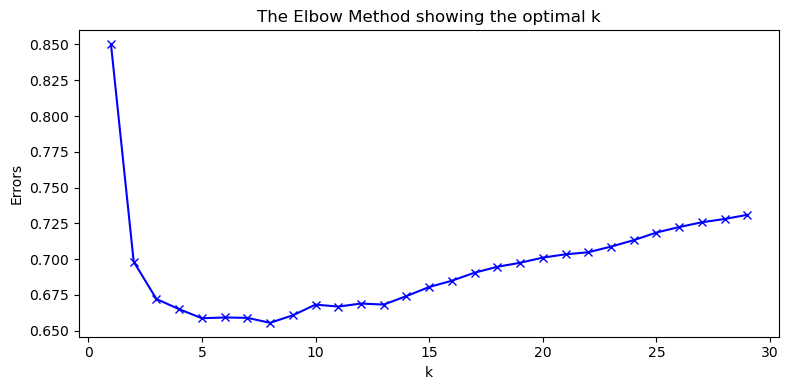

8


In [18]:
plt.figure(figsize=(8,4))
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('Errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()
k = errors.index(min(errors)) + 1
print(k)

### Question 8)

Run 10-Fold Cross validation (CV) and print accuracy values for each run of CV. Also print the final average accuracy of the model.

In [33]:
classifier = neighbors.KNeighborsRegressor(n_neighbors = k)
classifier.fit(X_train,Y_train)
acc = cross_val_score(classifier,X_test,Y_test, cv=10)
index = 1
for i in acc:
    print("score of :", index, " ", i)
    index += 1
print("Accuracy (mean): %", acc.mean() * 100)

score of : 1   0.9518813632099128
score of : 2   0.9481410626067472
score of : 3   0.9527272375033524
score of : 4   0.9507422768725441
score of : 5   0.9522130873352762
score of : 6   0.9481162622892629
score of : 7   0.9526646102623897
score of : 8   0.9436013734970211
score of : 9   0.9497826973854235
score of : 10   0.9529413398000643
Accuracy (mean): % 95.02811310761994


### Question 9)

Predict the price of new jewel data with the following custom features. 

![image.png](attachment:image.png)

In [30]:
pred = np.array([[0.3,2,2,2,62.4,55,3.9,2.98,2.56]]) 
pred.reshape(1,-1)

predictiion = classifier.predict(pred)
print("Prediction : ",predictiion[0])

Prediction :  13950.25
